In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. LOAD DATA

In [ ]:
# 1. LOAD DATA
df = pd.read_csv("Davos_combined_cleaned.csv")
print("Daten erfolgreich geladen.")

Daten erfolgreich geladen.

Number of filtered entries (Holiday Apartments/Hotels): 81


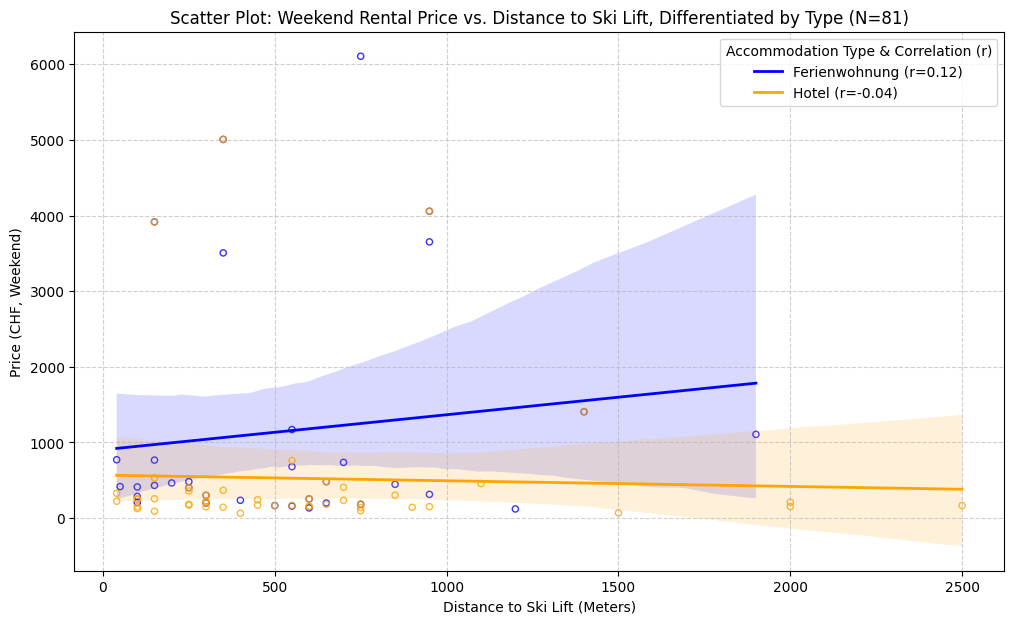

<Figure size 4200x2400 with 0 Axes>

In [ ]:
# --- 2. FILTER DATA ---
# Filter for all holiday apartments ('ferienwohnung') and hotels
df_analysis = df[df['type'].isin(['ferienwohnung','hotel'])].copy()

num_rows = len(df_analysis)
print(f"\nNumber of filtered entries (Holiday Apartments/Hotels): {num_rows}")

# --- 3. CREATE SCATTER PLOT (Empty Circles, Regression Line, No CI) ---

plt.figure(figsize=(12, 7))
type_colors = {'ferienwohnung': 'blue', 'hotel': 'orange'}
unique_types = df_analysis['type'].unique()

# Iterate through the accommodation types to create scatter plots and regression lines
for accommodation_type in unique_types:
    subset = df_analysis[df_analysis['type'] == accommodation_type]
    color = type_colors.get(accommodation_type, 'gray')
    
    # Calculate Pearson's r for the label
    r_val, p_value = pearsonr(subset['distance_skilift_meters'], subset['price'])
    
    # 1. Linear Regression Line and Confidence Interval (CI)
    # Use regplot to draw the line and the shaded CI area ("Fläche")
    sns.regplot(
        data=subset,
        x='distance_skilift_meters',
        y='price',
        scatter=False,          # Only draw the line and CI
        ci=95,                  # Draw the 95% Confidence Interval
        color=color,
        line_kws={'linestyle': '-', 'linewidth': 2},
        # Label the line/CI for the legend
        label=f"{accommodation_type.capitalize()} (r={r_val:.2f})" 
    )

    # 2. Scatter Plot with empty circles
    # Plot the points separately on top of the CI area
    plt.scatter(
        subset['distance_skilift_meters'],
        subset['price'],
        # Note: No label here, as the label is provided by the regplot/CI line
        facecolors='none',      # Fill color: Transparent
        edgecolors=color,       # Edge color: Type color
        alpha=0.8,
        s=20,                   # Size of the circles
        linewidths=1.0,         # Thickness of the outline
        marker='o'              # Circle marker
    )

# --- 4. FORMAT AND DISPLAY GRAPHIC ---

plt.title(f"Scatter Plot: Weekend Rental Price vs. Distance to Ski Lift, Differentiated by Type (N={num_rows})")
plt.xlabel("Distance to Ski Lift (Meters)")
plt.ylabel("Price (CHF, Weekend)")
plt.legend(title='Accommodation Type & Correlation (r)')
plt.grid(True, linestyle='--', alpha=0.6)

# Increase plot size and set DPI for better quality
plt.figure(figsize=(14, 8), dpi=300)

plt.show()